# San Francisco Subway BART project

<img src='bart.jpg'>

## Project requirements:
+ Which BART station is the busiest?
+ Which is the least popular BART route?
+ When is the best time to go to San Francisco?
+ Which day of the week is the busiest?
+ How many people ride BART late at night?
+ Is there ever a BART station where no one gets on or off?

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None) 
pd.set_option('display.max_rows', None)

In [14]:
df1=pd.read_csv('date-hour-soo-dest-2016.csv')
df2=pd.read_csv('date-hour-soo-dest-2017.csv')
df3=pd.read_csv('station_info.csv')

In [16]:
df1.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [18]:
df2.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


In [22]:
df=pd.concat([df1,df2], ignore_index=True)
# We combine df1 and df2..

In [24]:
df.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [20]:
df3.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


In [26]:
df=pd.merge(df, df3, left_on="Origin", right_on="Abbreviation")
# With the merge command, we merge the "Origin" column in df with the "Abbreviatio" column in df3. We obtain a new df.

# EDA

In [28]:
df.head()

,Origin,Destination,Throughput,DateTime,Abbreviation,Description,Location,Name
0,12TH,12TH,1,2016-01-01 00:00:00,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,12TH,16TH,1,2016-01-01 00:00:00,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
2,12TH,24TH,4,2016-01-01 00:00:00,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
3,12TH,ASHB,4,2016-01-01 00:00:00,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
4,12TH,BALB,2,2016-01-01 00:00:00,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)


In [30]:
df["Origin"].value_counts()

Origin
POWL    424161
CIVC    414949
EMBR    414424
MONT    410690
16TH    379041
DBRK    371996
12TH    371398
24TH    370851
19TH    365911
SFIA    356462
MCAR    354558
FTVL    339221
DALY    330412
COLS    328262
DELN    320289
BALB    319333
LAKE    314174
FRMT    311081
GLEN    304206
SANL    301214
ASHB    291354
BAYF    290326
PITT    289539
CONC    287980
HAYW    286075
WCRK    285019
WOAK    281927
RICH    277297
DUBL    275537
ROCK    273886
NBRK    263774
PLZA    261962
PHIL    258156
MLBR    257040
UCTY    241990
SBRN    234442
SHAY    223514
OAKL    220234
COLM    210347
WDUB    206153
SSAN    204748
LAFY    199035
CAST    197316
ORIN    181585
NCON    167898
Name: count, dtype: int64

In [ ]:
# We check how many rows the columns have with the unique code.

In [33]:
df["Origin"].nunique()

45

In [35]:
df["Destination"].nunique()

46

In [37]:
df["Throughput"].nunique()

950

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13269767 entries, 0 to 13269766
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Origin        object
 1   Destination   object
 2   Throughput    int64 
 3   DateTime      object
 4   Abbreviation  object
 5   Description   object
 6   Location      object
 7   Name          object
dtypes: int64(1), object(7)
memory usage: 809.9+ MB


In [41]:
df.isnull().sum()
# We do not have any empty data.

Origin          0
Destination     0
Throughput      0
DateTime        0
Abbreviation    0
Description     0
Location        0
Name            0
dtype: int64

## Feature Engineering

In [44]:
# We convert the data in the DateTime column into numeric values ​​that the machine can read as day, month and year.

In [46]:
df["DateTime"]=pd.to_datetime(df["DateTime"])

In [48]:
df["Year"]=df["DateTime"].dt.year
df["Month"]=df["DateTime"].dt.month
df["Day"]=df["DateTime"].dt.day
df["Month_Name"]=df["DateTime"].dt.month_name()
df["Day_Name"]=df["DateTime"].dt.day_name()
df["Hour"]=df["DateTime"].dt.hour

In [56]:
df.head()

,Origin,Destination,Throughput,Year,Month,Day,Month_Name,Day_Name,Hour,longitude,latitude
0,12TH,12TH,1,2016,1,1,January,Friday,0,-122.27145,37.803768
1,12TH,16TH,1,2016,1,1,January,Friday,0,-122.27145,37.803768
2,12TH,24TH,4,2016,1,1,January,Friday,0,-122.27145,37.803768
3,12TH,ASHB,4,2016,1,1,January,Friday,0,-122.27145,37.803768
4,12TH,BALB,2,2016,1,1,January,Friday,0,-122.27145,37.803768


In [50]:
df["longitude"]=df["Location"].apply(lambda x:float(x.split(",")[0]))
df["latitude"]=df["Location"].apply(lambda x: float(x.split(",")[1]))
# We separate the seemingly mixed latitude and longitude values ​​in the Location column into two columns [longitude and latitude].

In [52]:
df=df.drop(["DateTime","Description","Location","Name","Abbreviation"],axis=1)

In [54]:
df.sample(3)

,Origin,Destination,Throughput,Year,Month,Day,Month_Name,Day_Name,Hour,longitude,latitude
2956029,DBRK,DBRK,4,2016,4,18,April,Monday,12,-122.268133,37.870104
6739658,16TH,COLM,1,2016,9,3,September,Saturday,11,-122.419694,37.765062
1470353,HAYW,WCRK,2,2016,2,24,February,Wednesday,8,-122.087018,37.669723


In [58]:
df["Route"]=df["Origin"]+"-"+df["Destination"]

In [60]:
df.sample(5)

,Origin,Destination,Throughput,Year,Month,Day,Month_Name,Day_Name,Hour,longitude,latitude,Route
732060,GLEN,MLBR,1,2016,1,28,January,Thursday,13,-122.433817,37.733064,GLEN-MLBR
12750639,CIVC,EMBR,3,2017,4,14,April,Friday,22,-122.414123,37.779732,CIVC-EMBR
13123745,UCTY,SANL,3,2017,4,28,April,Friday,15,-122.017388,37.590630,UCTY-SANL
5581226,COLM,LAFY,1,2016,7,22,July,Friday,19,-122.466233,37.684638,COLM-LAFY
2150347,GLEN,HAYW,2,2016,3,19,March,Saturday,19,-122.433817,37.733064,GLEN-HAYW


## Data Analytics Question
+ Which BART station is busiest?

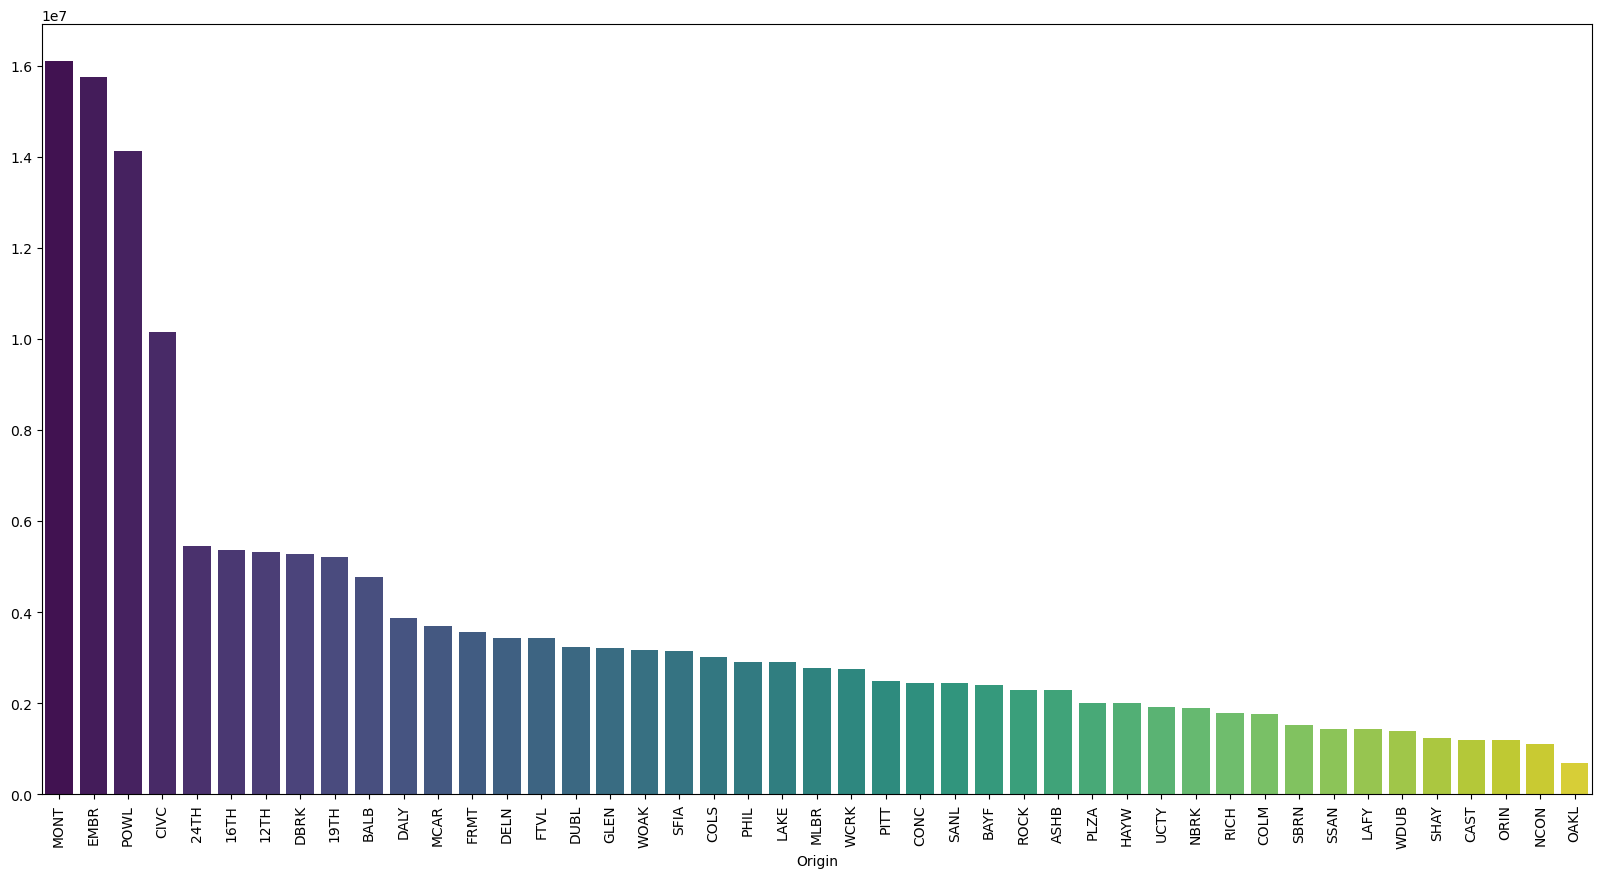

In [63]:
throughput_data_origin=df.groupby("Origin")["Throughput"].agg("sum").sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x=throughput_data_origin.index, y=throughput_data_origin.values, palette="viridis")    
plt.xticks(rotation=90);
# Throughput: Indicates the number of passengers carried at each station during the times given. 
# According to the question, we can examine the graph below to see which station was the most crowded.

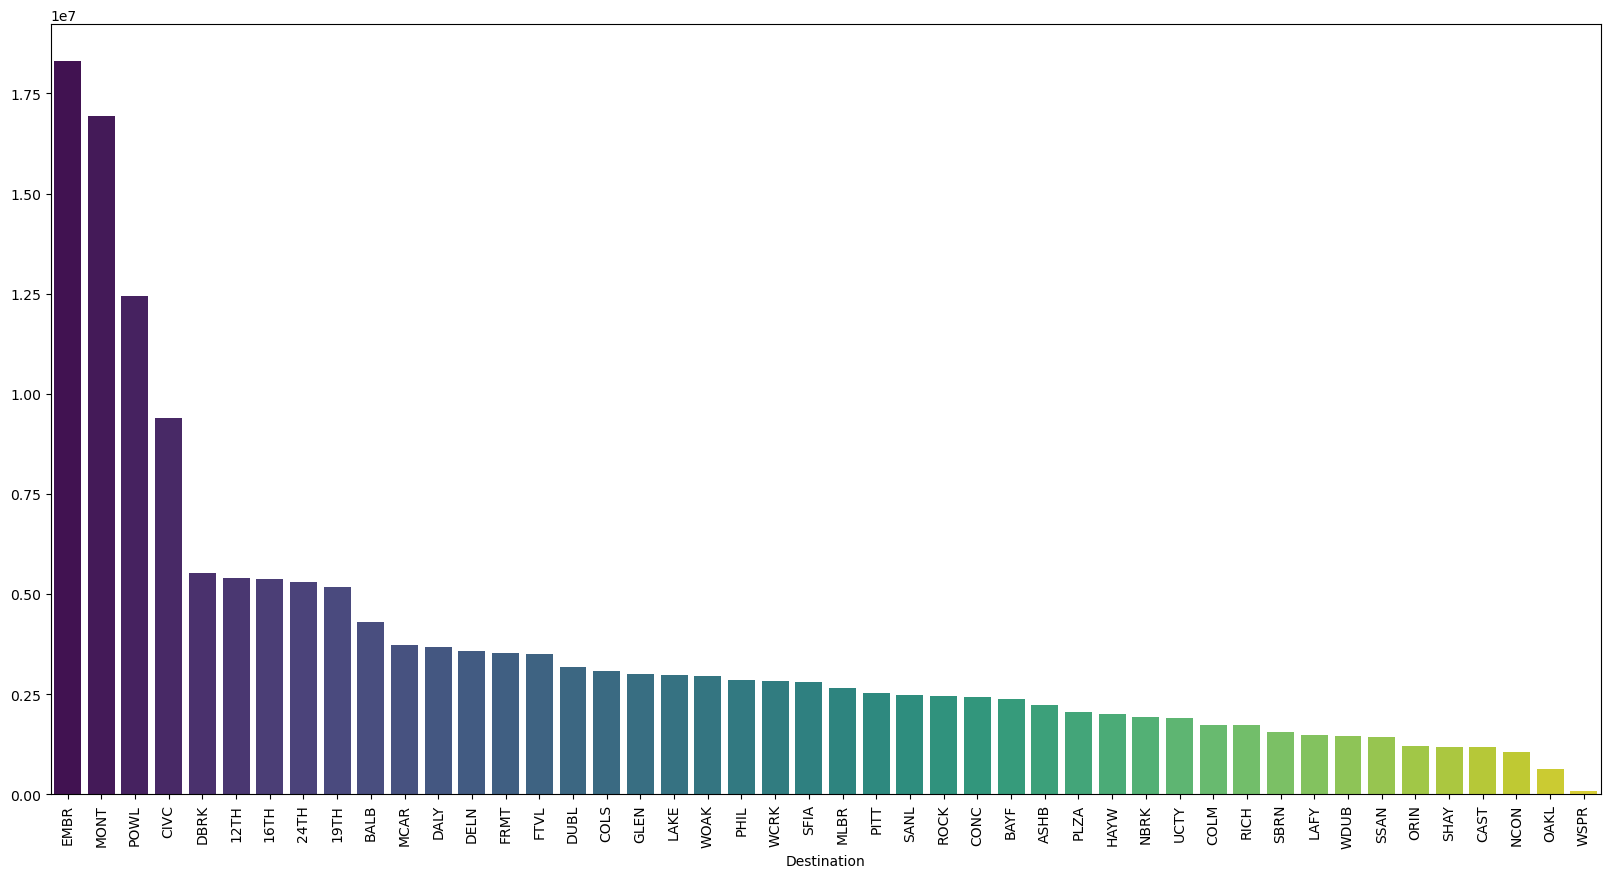

In [68]:
throughput_data_destination=df.groupby("Destination")["Throughput"].agg("sum").sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x=throughput_data_destination.index, y=throughput_data_destination.values, palette="viridis")    
plt.xticks(rotation=90);
# Similarly, we can examine the graph below to see the density of passengers at the stations at the destination.

### Which is the least preferred BART route?

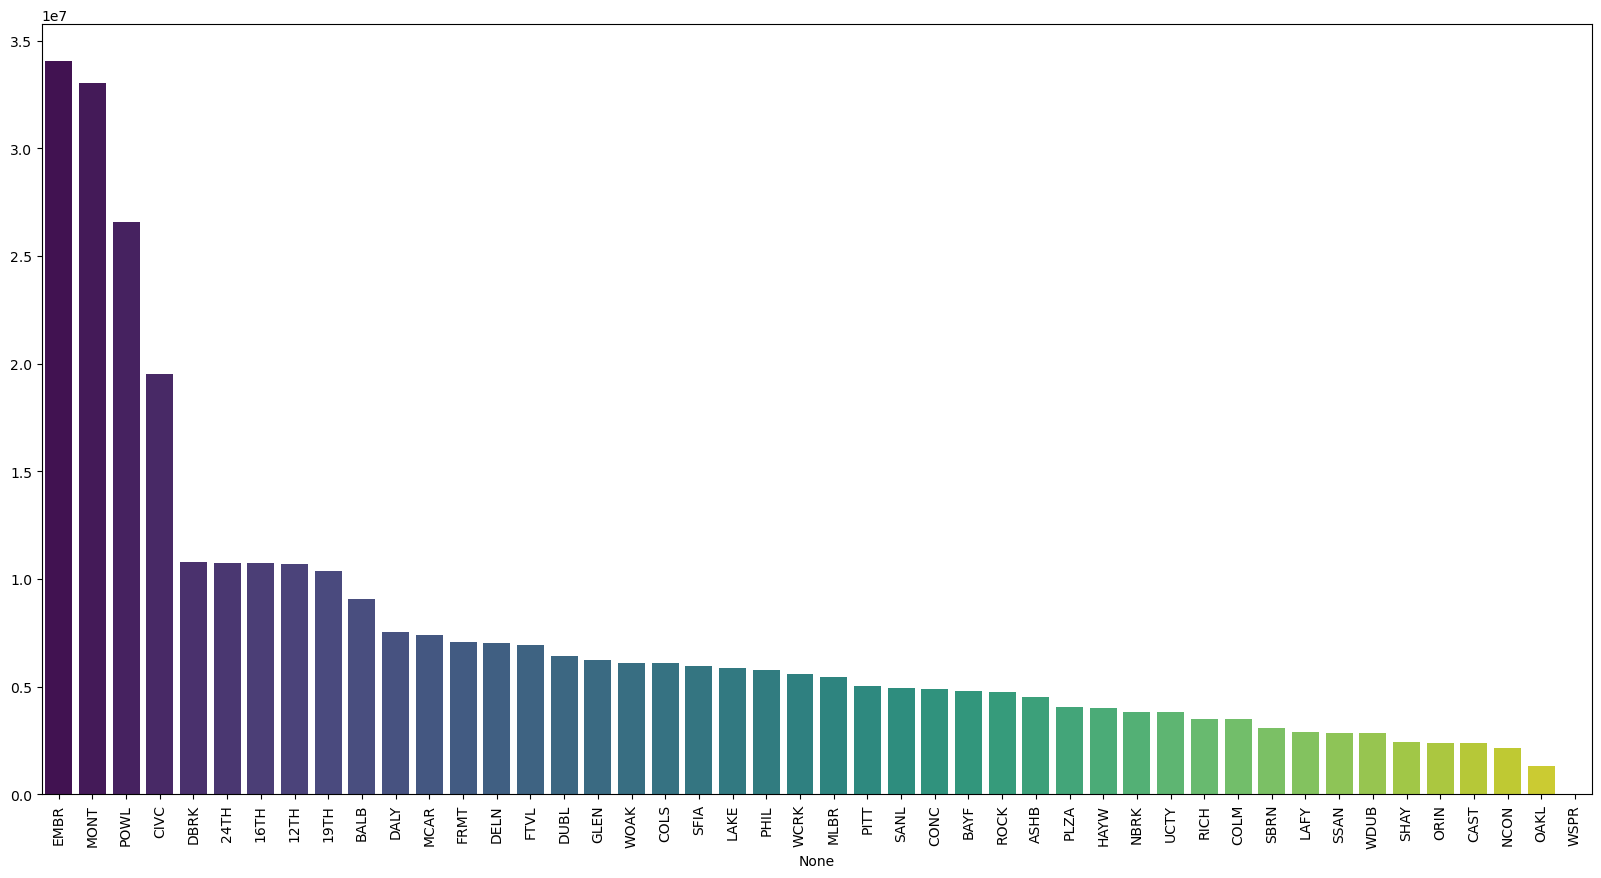

In [73]:
plt.figure(figsize=(20,10))
throughput_data_route=(df.groupby("Origin")["Throughput"].sum() + df.groupby("Destination")["Throughput"].sum()).sort_values(ascending=False)
sns.barplot(x=throughput_data_route.index, y=throughput_data_route.values, palette="viridis")    
plt.xticks(rotation=90);
# Here we can see the least preferred stations by looking at the density between the starting and destination points.

In [77]:
df.groupby("Route")["Throughput"].agg("sum").sort_values(ascending=True)
# We can see the least and most preferred stations by looking at the minimum number of passengers in the journeys between stations.

Route
SSAN-WSPR         41
SBRN-WSPR         43
MLBR-WSPR         45
COLM-WSPR         54
ORIN-WSPR         96
NCON-WSPR        113
LAFY-WSPR        123
PHIL-WSPR        241
WDUB-WSPR        248
RICH-WSPR        263
WCRK-WSPR        265
WOAK-WSPR        304
OAKL-WSPR        321
CAST-WSPR        325
CONC-WSPR        346
WDUB-NCON        358
NCON-WDUB        358
ROCK-WSPR        360
NBRK-WSPR        427
GLEN-WSPR        430
BALB-WSPR        430
LAFY-CAST        444
PLZA-WSPR        490
PITT-WSPR        498
SFIA-WSPR        533
DUBL-WSPR        545
WDUB-ORIN        645
WDUB-LAFY        660
CAST-LAFY        707
LAFY-WDUB        718
CAST-NCON        741
ORIN-WDUB        745
ASHB-WSPR        751
DELN-WSPR        774
24TH-WSPR        780
DUBL-NCON        789
NCON-CAST        802
NCON-DUBL        816
DALY-WSPR        843
SHAY-LAFY        848
COLM-OAKL        859
LAFY-SHAY        875
DUBL-LAFY        921
CAST-ORIN        956
LAFY-DUBL        987
SHAY-WSPR        999
SSAN-OAKL       1019
ORIN-SH

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13269767 entries, 0 to 13269766
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Origin       object 
 1   Destination  object 
 2   Throughput   int64  
 3   Year         int32  
 4   Month        int32  
 5   Day          int32  
 6   Month_Name   object 
 7   Day_Name     object 
 8   Hour         int32  
 9   longitude    float64
 10  latitude     float64
 11  Route        object 
dtypes: float64(2), int32(4), int64(1), object(5)
memory usage: 1012.4+ MB


In [79]:
df["Route"].value_counts()
# With this code, we can see the most and least preferred stations by looking at the number of trips between the start and destination routes.

Route
POWL-24TH    10102
19TH-CIVC     9985
WOAK-POWL     9962
19TH-POWL     9954
POWL-DELN     9933
POWL-16TH     9923
POWL-FTVL     9922
12TH-MONT     9910
12TH-POWL     9910
19TH-EMBR     9899
CIVC-FTVL     9898
POWL-RICH     9896
MONT-24TH     9895
POWL-DALY     9892
MCAR-CIVC     9884
POWL-GLEN     9862
MCAR-POWL     9854
EMBR-24TH     9849
EMBR-DELN     9848
CIVC-DELN     9838
MONT-FTVL     9838
12TH-CIVC     9835
MCAR-EMBR     9829
MONT-DELN     9829
WOAK-CIVC     9826
24TH-POWL     9822
16TH-POWL     9820
DBRK-EMBR     9816
EMBR-16TH     9811
POWL-DUBL     9804
CIVC-24TH     9798
24TH-CIVC     9795
POWL-BALB     9775
12TH-EMBR     9774
19TH-16TH     9769
WOAK-EMBR     9765
POWL-PITT     9754
EMBR-FTVL     9753
POWL-COLM     9751
EMBR-DUBL     9741
MCAR-MONT     9737
16TH-MONT     9732
POWL-POWL     9731
DALY-POWL     9720
19TH-MONT     9718
DBRK-POWL     9718
24TH-MONT     9717
16TH-CIVC     9714
MONT-DUBL     9714
MONT-16TH     9712
POWL-CONC     9712
CIVC-MCAR     9709
MONT-W

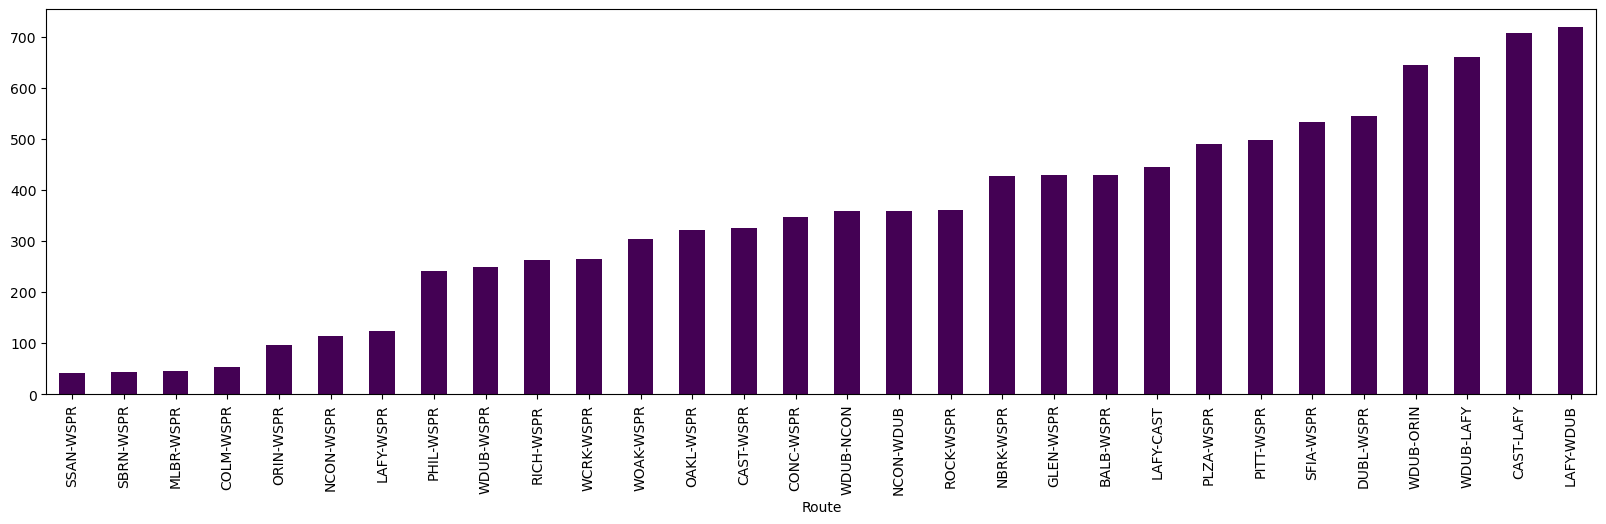

In [83]:
plt.figure(figsize=(20,5))
df.groupby('Route')['Throughput'].sum().sort_values(ascending=True)[:30].plot(kind="bar",colormap="viridis");
# Group unique routes.
# Sort the 30 least dense groups among these routers from smallest to largest

## When is the best time to go from Berkeley to San Francisco?
+ Berkeley Station Code => DBRK

+ SF Station Code => SSAN

+ Route => DBRK-SSAN

In [86]:
df[df["Route"]=="DBRK-SSAN"].head()

,Origin,Destination,Throughput,Year,Month,Day,Month_Name,Day_Name,Hour,longitude,latitude,Route
1962,DBRK,SSAN,2,2016,1,1,January,Friday,2,-122.268133,37.870104,DBRK-SSAN
19290,DBRK,SSAN,2,2016,1,1,January,Friday,21,-122.268133,37.870104,DBRK-SSAN
21347,DBRK,SSAN,3,2016,1,1,January,Friday,23,-122.268133,37.870104,DBRK-SSAN
31132,DBRK,SSAN,1,2016,1,2,January,Saturday,13,-122.268133,37.870104,DBRK-SSAN
38101,DBRK,SSAN,1,2016,1,2,January,Saturday,18,-122.268133,37.870104,DBRK-SSAN


In [88]:
df[df["Route"]=="DBRK-SSAN"].groupby(["Hour","Day_Name"])["Throughput"].sum().sort_values()
# To list the days with the least passengers:

Hour  Day_Name 
1     Thursday       1
      Wednesday      2
      Monday         2
2     Friday         2
3     Sunday         2
2     Sunday         5
1     Tuesday        5
8     Sunday         5
7     Saturday       8
8     Saturday      10
0     Monday        12
1     Friday        15
6     Friday        18
9     Sunday        18
5     Monday        21
0     Tuesday       22
      Thursday      22
6     Thursday      23
10    Sunday        24
9     Saturday      25
5     Wednesday     25
6     Tuesday       26
23    Sunday        29
5     Thursday      30
      Tuesday       30
6     Wednesday     30
5     Friday        31
10    Monday        32
12    Sunday        32
11    Wednesday     33
23    Monday        34
11    Tuesday       34
13    Sunday        35
0     Wednesday     35
21    Sunday        38
12    Wednesday     38
14    Sunday        39
12    Tuesday       40
10    Saturday      41
15    Sunday        41
6     Monday        41
11    Sunday        41
12    Thursday    

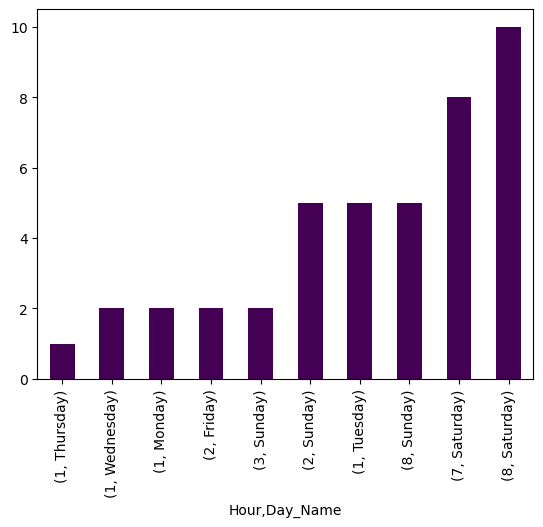

In [90]:
df[df["Route"]=="DBRK-SSAN"].groupby(["Hour","Day_Name"])["Throughput"].sum().sort_values()[:10].plot.bar(colormap="viridis");

In [136]:
# We found Thursday to be the day with the fewest passengers.

## Which day of the week is the busiest?

In [93]:
df.groupby("Day_Name")["Throughput"].sum().sort_values(ascending=False)

Day_Name
Wednesday    30661163
Tuesday      30334044
Thursday     30037586
Friday       28362453
Monday       26953148
Saturday     13689839
Sunday        9597632
Name: Throughput, dtype: int64

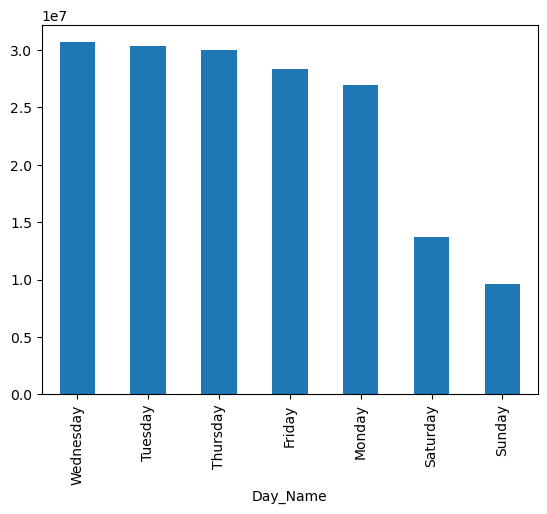

In [95]:
df.groupby("Day_Name")["Throughput"].sum().sort_values(ascending=False).plot.bar();

## How many people ride BART late at night?

In [98]:
df["Hour"].value_counts()

Hour
17    808632
18    803665
16    781518
19    744586
9     743362
15    739185
8     734705
14    710178
10    703194
13    699798
12    691901
11    689756
20    658982
7     645591
21    624213
22    588265
6     523709
23    497980
0     356428
5     325219
1     114341
4      81079
2       1936
3       1544
Name: count, dtype: int64

In [100]:
df[(df["Hour"]>21) | (df["Hour"]<8)]["Throughput"].sum()

np.int64(28004116)

# Data Science Questions
+ Calculate the straight line distance between each station

In [103]:
df["latitude_radians"]=np.radians(df["latitude"])
df["longitude_radians"]=np.radians(df["longitude"])

In [105]:
df.head()

,Origin,Destination,Throughput,Year,Month,Day,Month_Name,Day_Name,Hour,longitude,latitude,Route,latitude_radians,longitude_radians
0,12TH,12TH,1,2016,1,1,January,Friday,0,-122.27145,37.803768,12TH-12TH,0.6598,-2.134039
1,12TH,16TH,1,2016,1,1,January,Friday,0,-122.27145,37.803768,12TH-16TH,0.6598,-2.134039
2,12TH,24TH,4,2016,1,1,January,Friday,0,-122.27145,37.803768,12TH-24TH,0.6598,-2.134039
3,12TH,ASHB,4,2016,1,1,January,Friday,0,-122.27145,37.803768,12TH-ASHB,0.6598,-2.134039
4,12TH,BALB,2,2016,1,1,January,Friday,0,-122.27145,37.803768,12TH-BALB,0.6598,-2.134039


In [107]:
unique_df=df.drop_duplicates(subset=["Origin"],ignore_index=True)
unique_df=unique_df[["latitude_radians","longitude_radians","Origin"]]
unique_df.head()

,latitude_radians,longitude_radians,Origin
0,0.659800,-2.134039,12TH
1,0.659125,-2.136627,16TH
2,0.659880,-2.133990,19TH
3,0.658905,-2.136600,24TH
4,0.660656,-2.134015,ASHB


In [109]:
coordinates=unique_df[["latitude_radians","longitude_radians"]].to_numpy()
distances=haversine_distances(coordinates,coordinates)

In [111]:
distances_km=distances*6371

In [113]:
distances_km_df=pd.DataFrame(
    distances_km,
    index=unique_df["Origin"],
    columns=unique_df["Origin"]
)

In [115]:
distances_km_df 
# Shows the distance between BART stations.

Origin,12TH,16TH,19TH,24TH,ASHB,BALB,BAYF,CAST,CIVC,COLM,COLS,CONC,DALY,DBRK,DELN,DUBL,EMBR,FRMT,FTVL,GLEN,HAYW,LAFY,LAKE,MCAR,MLBR,MONT,NBRK,NCON,OAKL,ORIN,PHIL,PITT,PLZA,POWL,RICH,ROCK,SANL,SBRN,SFIA,SHAY,SSAN,UCTY,WCRK,WDUB,WOAK
Origin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12TH,0.000000,13.720175,0.567617,14.097927,5.453806,17.972899,17.421986,21.318066,12.818548,21.651800,8.602724,28.452150,20.488348,7.381976,14.064957,34.641522,11.099285,37.726994,5.254274,16.294042,22.027147,16.279546,0.930228,2.839447,24.795767,11.500185,7.876464,30.993614,11.334582,11.315857,23.450324,37.305931,11.254330,12.186511,16.442537,4.881371,13.315746,22.428251,23.437267,26.644817,21.698728,32.578345,21.179219,32.315075,2.084928
16TH,13.720175,0.000000,14.123076,1.406790,16.370223,5.417745,26.873362,31.369785,1.703137,9.834954,19.629420,41.399854,7.862292,17.710613,19.956444,46.313509,3.678977,45.322092,17.219854,3.768466,31.123107,29.571877,14.036737,15.184031,18.552504,3.163421,17.025981,43.624344,19.134809,24.249960,36.740696,50.306911,18.615264,2.391407,19.977128,17.236833,23.259691,14.158399,16.751655,35.047867,11.411739,40.370112,34.647001,43.824988,11.806930
19TH,0.567617,14.123076,0.000000,14.537177,4.944611,18.449743,17.594397,21.423040,13.176704,22.162579,8.759155,27.927226,20.972364,6.866855,13.652407,34.575547,11.413346,37.927682,5.396993,16.761912,22.193837,15.772063,1.294459,2.307486,25.363052,11.827735,7.411705,30.454558,11.680862,10.773359,22.948482,36.787537,10.815966,12.530541,16.099056,4.316179,13.491787,22.989786,24.004818,26.832791,22.238484,32.780913,20.697326,32.267711,2.363310
24TH,14.097927,1.406790,14.537177,0.000000,17.138578,4.296647,26.382151,30.899845,3.051922,8.647687,19.454198,42.092373,6.828586,18.567582,21.157028,45.989716,4.861216,44.508828,17.231066,2.560421,30.546688,30.156601,14.327988,15.774585,17.148474,4.372678,17.959316,44.384429,18.629589,24.894688,37.339178,50.997728,19.709716,3.668896,21.283104,17.885535,22.878946,12.756104,15.346553,34.367219,10.069632,39.597423,35.183337,43.483323,12.280671
ASHB,5.453806,16.370223,4.944611,17.138578,0.000000,21.355016,21.438504,24.836544,15.038489,25.435815,12.762538,25.053770,23.915627,1.931222,9.023275,36.672412,12.990622,41.772579,9.560819,19.604034,25.948929,13.531585,6.216814,2.652851,29.895394,13.494601,2.630089,27.257098,16.331015,8.088818,20.581818,33.957113,6.091619,14.299741,11.850630,1.872092,17.430801,27.148960,28.448090,30.663606,25.948183,36.657191,18.717531,34.527755,5.766857
BALB,17.972899,5.417745,18.449743,4.296647,21.355016,0.000000,28.370186,32.896601,7.100637,4.426359,22.326582,46.215044,2.560946,22.828351,25.374187,48.284910,9.084916,45.301700,20.509238,1.754601,32.237574,34.185441,18.090735,19.859788,14.512558,8.575488,22.246533,48.564235,20.718954,28.995894,41.370956,55.112936,23.993534,7.808705,25.332068,22.011712,25.213150,9.717283,12.706137,35.692841,6.383547,40.567612,39.147064,45.742854,16.283721
BAYF,17.421986,26.873362,17.594397,26.382151,21.438504,28.370186,0.000000,4.531980,26.914792,29.923394,8.836838,31.947031,30.155769,22.928463,30.382150,20.008136,26.068034,20.365540,12.198752,27.328128,4.607425,21.822855,16.508945,19.196143,25.303058,26.239989,24.035914,35.210338,7.752571,20.793251,26.480943,39.184309,27.433911,26.594946,33.285280,19.759903,4.106354,26.340207,25.078559,9.252500,28.171545,15.232015,23.766972,17.447384,19.075498
CAST,21.318066,31.369785,21.423040,30.899845,24.836544,32.896601,4.531980,0.000000,31.370282,34.380122,12.755491,31.731127,34.661193,26.154416,33.585225,15.570095,30.458562,17.194416,16.066778,31.860095,2.544392,22.917755,20.433426,22.798554,29.179789,30.649412,27.362164,35.029355,12.274283,22.926198,26.489444,38.245665,30.660487,31.029730,36.648450,23.060080,8.262625,30.561191,29.103355,6.474328,32.551621,12.255757,23.892538,13.004394,23.100389
CIVC,12.818548,1.703137,13.176704,3.051922,15.038489,7.100637,26.914792,31.370282,0.000000,11.524301,19.315585,40.092237,9.505217,16.291033,18.282610,46.10

## Create a model that can predict the number of people commuting between any 2 stations on Bart:
+ How would you approach this?
+ What additional data would you need?
+ How would you like the city or Bart authorities to use your data?

In [118]:
df_weekday=df[(df["Day_Name"]!="Saturday")| (df["Day_Name"]!="Sunday")]

In [120]:
df_route=df_weekday.groupby("Route")["Throughput"].mean().reset_index()
df_route.columns=["Route","Average_Throughput"]
df_route["Average_Throughput"] = df_route["Average_Throughput"].astype(int) 

In [122]:
df_weekday=pd.merge(df_weekday, df_route, on="Route")

In [124]:
df_weekday=df_weekday[(df_weekday["Hour"]==8) |(df_weekday["Hour"]==17)]

In [126]:
df_weekday['working']=df_weekday['Throughput']-df_weekday['Average_Throughput']

In [128]:
df_weekday.groupby(['Route','Day_Name'])['working'].sum().sort_values(ascending=False)[:40]

Route      Day_Name 
PHIL-EMBR  Tuesday      44199
           Wednesday    42265
BALB-MONT  Tuesday      42261
24TH-MONT  Tuesday      42024
           Wednesday    41359
BALB-MONT  Wednesday    41356
PHIL-EMBR  Thursday     40062
DUBL-EMBR  Tuesday      39914
BALB-MONT  Thursday     39885
24TH-MONT  Thursday     39556
PHIL-EMBR  Monday       37337
DUBL-EMBR  Wednesday    37331
PHIL-MONT  Tuesday      37117
BALB-MONT  Friday       35661
PHIL-MONT  Wednesday    35145
DUBL-EMBR  Thursday     35100
24TH-MONT  Monday       34640
BALB-MONT  Monday       34586
FRMT-EMBR  Tuesday      34023
19TH-EMBR  Tuesday      33819
PHIL-MONT  Thursday     33768
24TH-EMBR  Tuesday      33384
19TH-EMBR  Wednesday    33289
DUBL-EMBR  Monday       33031
24TH-EMBR  Wednesday    32719
24TH-MONT  Friday       32703
DALY-MONT  Wednesday    32292
FRMT-EMBR  Wednesday    32161
DALY-MONT  Tuesday      32097
19TH-EMBR  Thursday     31235
24TH-EMBR  Thursday     31089
PHIL-MONT  Monday       31071
DALY-MONT  Thursday

In [130]:
df_weekday.groupby(['Day_Name'])['working'].sum().sort_values(ascending=False)

Day_Name
Tuesday      4634030
Wednesday    4611762
Thursday     4400544
Monday       3827240
Friday       3615267
Saturday     -738742
Sunday      -1065113
Name: working, dtype: int64

<Axes: xlabel='Route'>

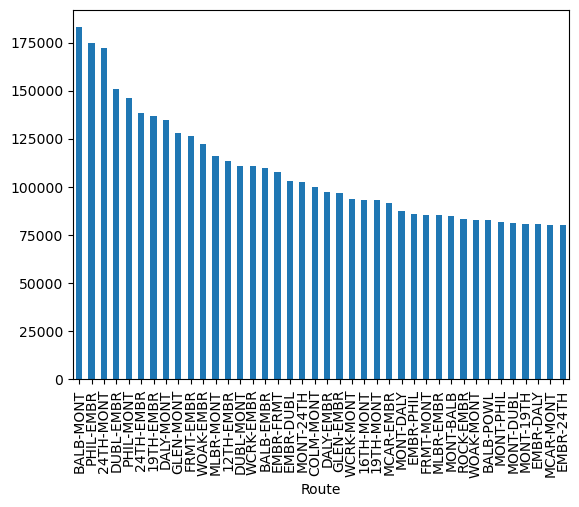

In [132]:
df_weekday.groupby('Route')['working'].sum().sort_values(ascending=False)[:40].plot.bar()

In [134]:
df_weekday['working'].sum()

np.int64(19284988)